In [1]:
import torch
import torch.nn.functional as F     # 激励函数都在这
from torch.autograd import Variable
import numpy as np
# python 的可视化模块, 我有教程 (https://morvanzhou.github.io/tutorials/data-manipulation/plt/)
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# 在Numpy中
a=np.ones(10)
b=np.ones(10)*2
c=b * a
d=c+1
print(d)

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [22]:
# 在PyTorch中
A=Variable(torch.FloatTensor([3]))
B=Variable(torch.FloatTensor([5]))
C=B*A
# D=C+Constant(1)

In [23]:
C

tensor([15.])

In [2]:
# 做一些假数据来观看图像
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

x_np = x.data.numpy()   # 换成 numpy array, 出图时用

In [3]:
type(torch.linspace(-5, 5, 200))

torch.Tensor

In [4]:
"""
# nn.functional.sigmoid 等函数调用方式已经过时
# 几种常用的 激励函数
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类
"""


# 几种常用的 激励函数
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类

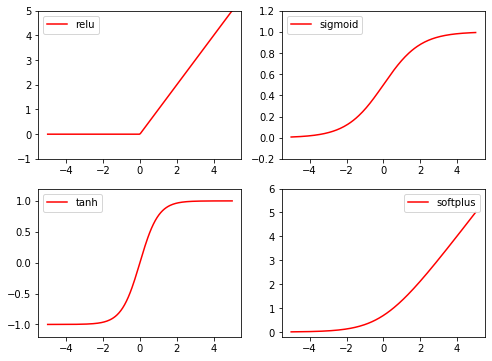

In [5]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

## -1 Regression

In [6]:
a_tor = torch.linspace(-1, 1, 100)
a_tor

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [7]:
type(a_tor)

torch.Tensor

In [8]:
a_tor.shape

torch.Size([100])

In [9]:
k=np.eye(3)

In [10]:
k.shape

(3, 3)

In [11]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  
# x data (tensor), shape=(100, 1)

In [12]:
x.shape

torch.Size([100, 1])

In [13]:
x.size()

torch.Size([100, 1])

In [14]:
y = x.pow(2) + 0.2*torch.rand(x.size())    # noisy y data (tensor), shape=(100, 1)

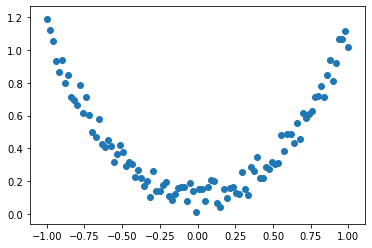

In [15]:
# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [16]:
# 继承 torch 的 Module
class Net(torch.nn.Module):  
    def __init__(self, n_feature, n_hidden, n_output):
        # 继承 __init__ 功能
        super(Net, self).__init__()     
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    # 这同时也是 Module 中的 forward 功能
    def forward(self, x):   
        # 正向传播输入值, 神经网络分析出输出值
        # 激励函数(隐藏层的线性值)
        x = F.relu(self.hidden(x))
        # 输出值     
        x = self.predict(x)             
        return x

In [17]:
net = Net(n_feature=1, n_hidden=10, n_output=1)

In [18]:
print(net)  # net 的结构
"""
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)
"""

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


'\nNet (\n  (hidden): Linear (1 -> 10)\n  (predict): Linear (10 -> 1)\n)\n'

In [19]:
net.parameters()

<generator object Module.parameters at 0x12b4af1b0>

### Train network

In [22]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率

loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

In [23]:
for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)     # 计算两者的误差 （预测值，真实值）
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

### 可视化训练

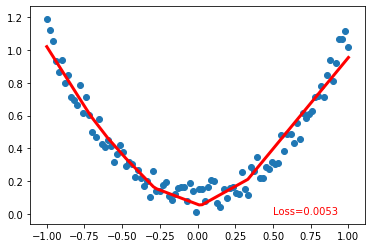

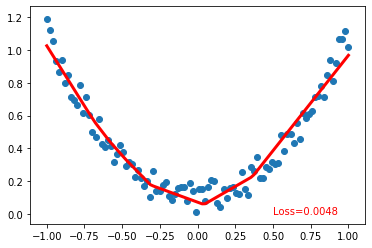

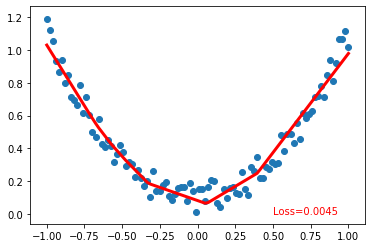

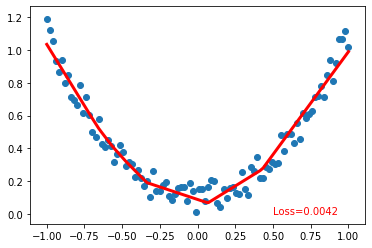

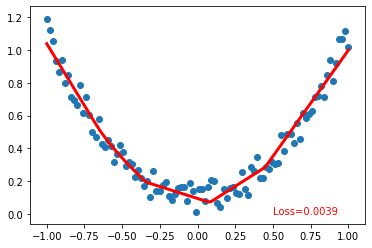

In [24]:
plt.ion()   # 实时画图
plt.show()

for t in range(200):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)     # 计算两者的误差 （预测值，真实值）
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    # 接着上面来
    if t % 40 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=3)
        
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()   # 画图
plt.show()

## -2 Classifiction 分类

In [2]:
# torch.manual_seed(1)    # reproducible

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 2)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 2)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )

In [3]:
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

In [4]:
type(x)

torch.Tensor

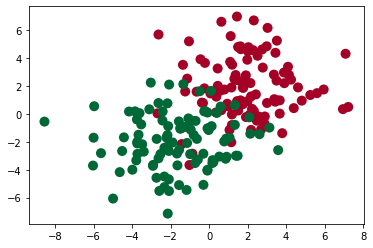

In [5]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [28]:
# 画图
# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

### 建立神经网络

In [6]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

print(net)  # net 的结构
"""
Net (
  (hidden): Linear (2 -> 10)
  (out): Linear (10 -> 2)
)
"""

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


'\nNet (\n  (hidden): Linear (2 -> 10)\n  (out): Linear (10 -> 2)\n)\n'

### 训练网络 

In [7]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.002)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()      

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

### 可视化训练过程

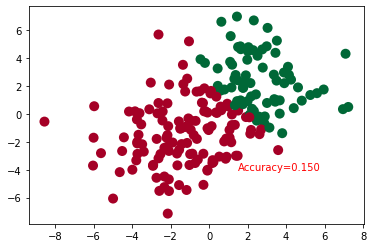

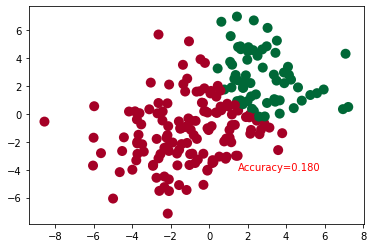

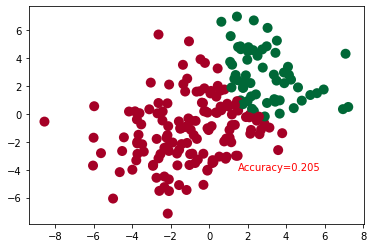

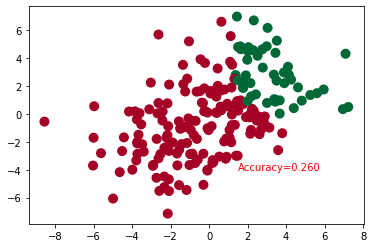

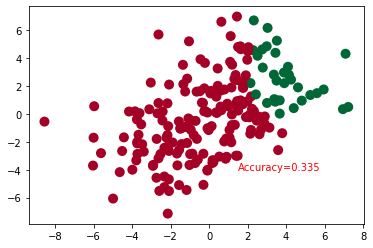

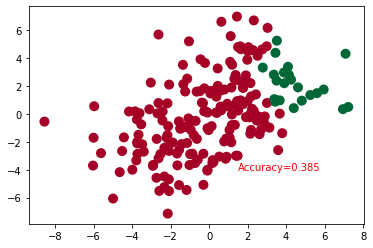

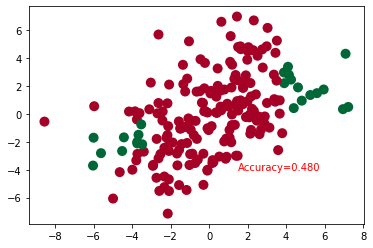

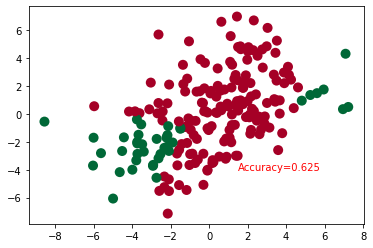

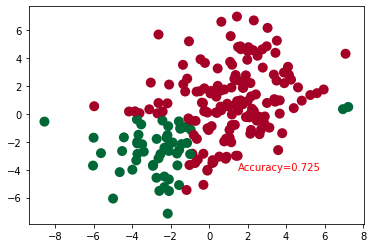

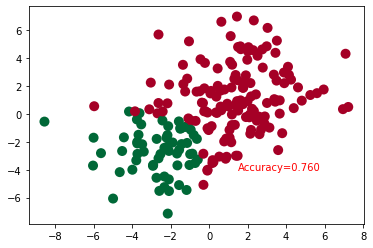

In [8]:
plt.ion()   # 画图
# plt.show()
for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.3f' % accuracy, fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

### 可视化训练过程2

ToDO: 
-1尚不太清楚上下两种写法的差异即：
  out vs F.softmax(out)

-2 prediction.data.numpy().squeeze() vs prediction.data.numpy()

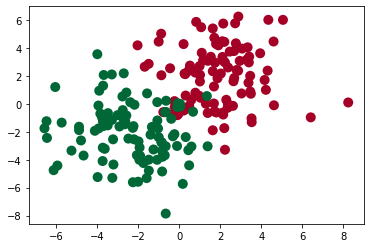

In [10]:
# torch.manual_seed(1)    # reproducible

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 2)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 2)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [11]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

print(net)  # net 的结构
"""
Net (
  (hidden): Linear (2 -> 10)
  (out): Linear (10 -> 2)
)
"""
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.002)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss() 

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


/Users/jcd/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


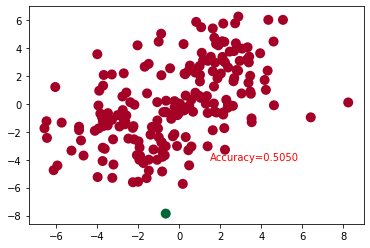

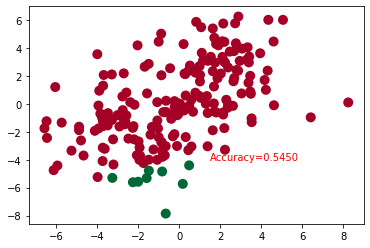

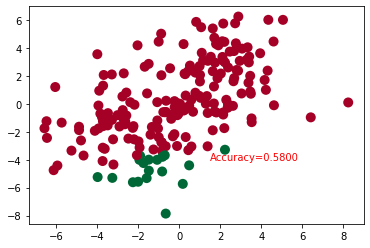

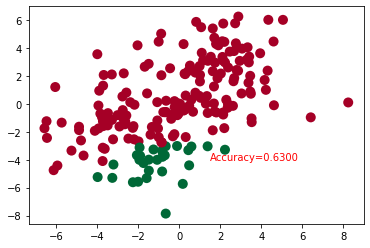

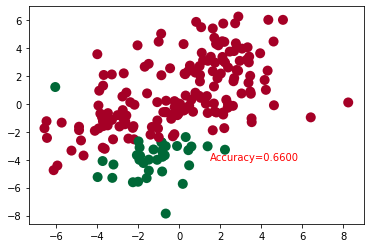

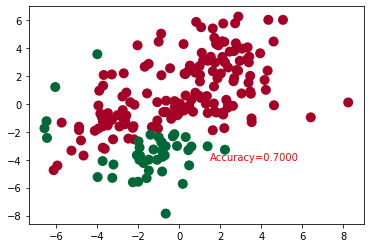

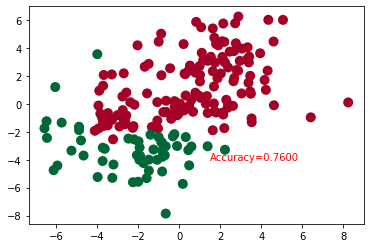

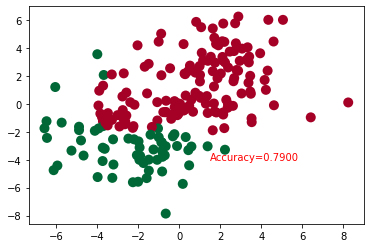

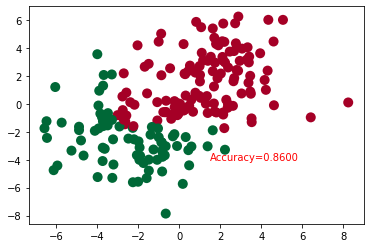

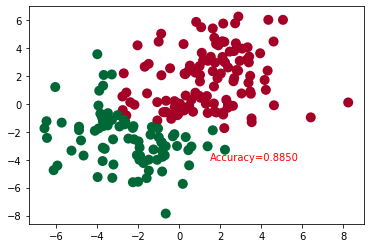

In [12]:
plt.ion()   # 画图
# plt.show()
for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    # 接着上面来
    if t % 10 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
#         print("out is:",out)
#         print("F.softmax(out) is:",F.softmax(out))
        prediction = torch.max(F.softmax(out), 1)[1]
        
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.4f' % accuracy, fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)
    
plt.ioff()  # 停止画图
plt.show()

## sequential network: 快速搭建法 build_nn_quickly

In [ ]:
# 之前使用的搭建方法
# replace following class code with an easy sequential network
"""
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net1 = Net(1, 10, 1)

print(net1)     # net1 architecture
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)
"""

In [26]:
# easy and fast way to build your network
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

print(net2)     # net2 architecture
"""
Sequential (
  (0): Linear (1 -> 10)
  (1): ReLU ()
  (2): Linear (10 -> 1)
)
"""

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


'\nSequential (\n  (0): Linear (1 -> 10)\n  (1): ReLU ()\n  (2): Linear (10 -> 1)\n)\n'

/Users/jcd/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


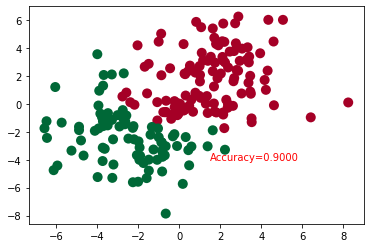

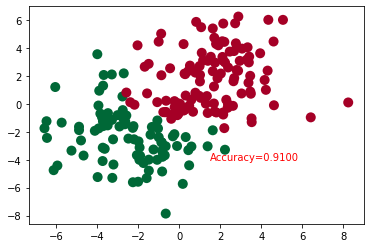

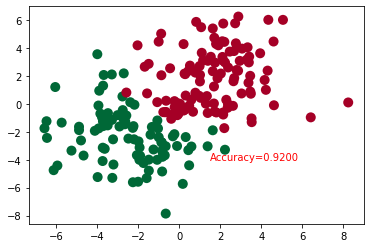

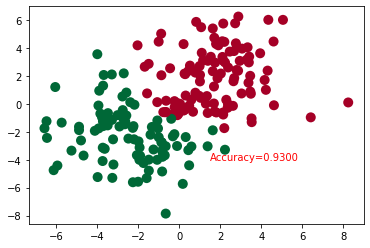

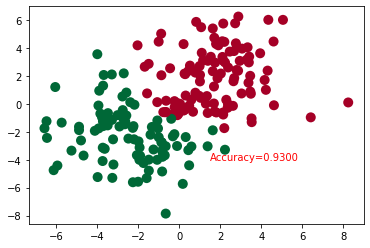

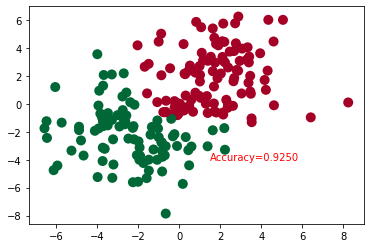

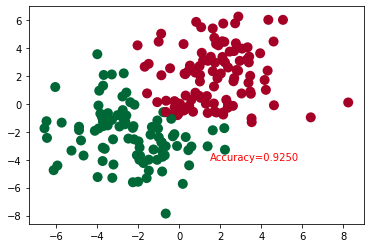

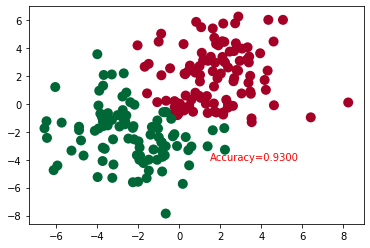

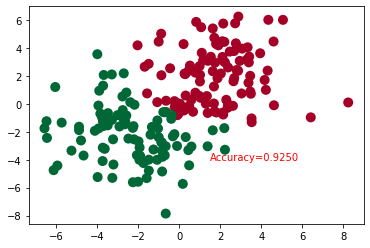

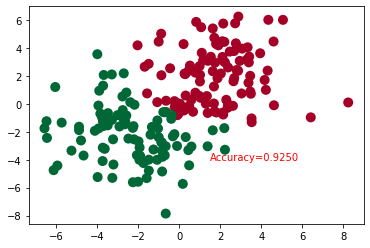

In [27]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.002)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss() 
plt.ion()   # 画图
# plt.show()
for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    if t % 10 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.4f' % accuracy, fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)
    
plt.ioff()  # 停止画图
plt.show()